In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ipl_df = pd.read_csv('ipl.csv')

In [3]:
ipl_df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
## no missing values hence no imputation needed

In [6]:
ipl_df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [7]:
## removing unwanted columns

# This model doesnt consider Venue,batsmen and bowler as features . A more sophisticated model can be build that rates batsmen/bowler as
# per this skill/or maybe bid price

## dropping cols
ipl_df.drop(['venue','batsman','bowler','mid','striker','non-striker'],axis = 1,inplace = True)

In [8]:
ipl_df.shape

(76014, 9)

In [9]:
## remove inconsistent teams
# ipl_df['bat_team'].unique()
ipl_df = ipl_df[ipl_df['bat_team'].isin(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Sunrisers Hyderabad']) &  ipl_df['bowl_team'].isin(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Sunrisers Hyderabad'])]

In [10]:
ipl_df.shape

(53811, 9)

In [11]:
## convert date from string to datetime object
from datetime import datetime

# function strptime expect string value , need to be applied on each string value

ipl_df['date'] = ipl_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


In [12]:
ipl_df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [14]:
## EDA on data in single line using dtale
! pip install dtale
import dtale
dtale.show(ipl_df, ignore_duplicate=True)

  Using cached dtale-1.15.2-py2.py3-none-any.whl (7.6 MB)
  Using cached dash-1.16.2.tar.gz (72 kB)
  Using cached dash_bootstrap_components-0.10.6-py2.py3-none-any.whl (185 kB)
  Using cached squarify-0.4.3-py3-none-any.whl (4.3 kB)
  Using cached dash_daq-0.5.0.tar.gz (642 kB)
  Using cached dash_colorscales-0.0.4.tar.gz (62 kB)
  Using cached xarray-0.16.1-py3-none-any.whl (720 kB)
  Using cached flask_ngrok-0.0.25-py3-none-any.whl (3.1 kB)
  Using cached Flask-Compress-1.5.0.tar.gz (6.5 kB)
  Using cached plotly-4.11.0-py2.py3-none-any.whl (13.1 MB)
  Using cached dash_renderer-1.8.2.tar.gz (1.0 MB)
  Using cached dash_core_components-1.12.1.tar.gz (3.4 MB)
  Using cached dash_html_components-1.1.1.tar.gz (188 kB)
  Using cached dash_table-4.10.1.tar.gz (1.8 MB)
  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for dash: filename=dash-1.16.2-py3-none-any.whl size=82325 sha256=d95a0fabb2086d4b3e07c0a9626dc122aa8c6f515338ef2183b5d8b01addabfb
  Stored in directory: c:\users

In [15]:
## OHE for categorical features
ipl_df_encoded = pd.get_dummies(ipl_df)
ipl_df_encoded.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,2008-04-18,1,0,0.1,1,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2008-04-18,1,0,0.2,1,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2008-04-18,2,0,0.2,2,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2008-04-18,2,0,0.3,2,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2008-04-18,2,0,0.4,2,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
## splitting into labels and features
## first removing date column 

ipl_df_encoded.drop(['date'],axis= 1,inplace = True)
ipl_df_encoded.head()

X = ipl_df_encoded.loc[:,ipl_df_encoded.columns != 'total']
y = ipl_df_encoded.loc[:,ipl_df_encoded.columns == 'total']


In [17]:
## feature Importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
# print(model.feature_importances_)
sorted(zip(model.feature_importances_,X.columns),reverse = True)

<ipython-input-17-d340f01d6f46>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[(0.22440875504833638, 'runs'),
 (0.18575912155574534, 'runs_last_5'),
 (0.17352343183075458, 'wickets'),
 (0.12323284410510646, 'overs'),
 (0.0420212932244037, 'wickets_last_5'),
 (0.017870761682794802, 'bat_team_Chennai Super Kings'),
 (0.017758472041518435, 'bowl_team_Kings XI Punjab'),
 (0.017649803366604405, 'bowl_team_Rajasthan Royals'),
 (0.017564499563903553, 'bowl_team_Mumbai Indians'),
 (0.017272962745915433, 'bat_team_Delhi Daredevils'),
 (0.017141088209621052, 'bowl_team_Royal Challengers Bangalore'),
 (0.01713586068471586, 'bat_team_Mumbai Indians'),
 (0.016118580904156125, 'bat_team_Royal Challengers Bangalore'),
 (0.01572255604272595, 'bat_team_Kings XI Punjab'),
 (0.015367108448657978, 'bowl_team_Kolkata Knight Riders'),
 (0.015140547816405902, 'bat_team_Rajasthan Royals'),
 (0.015090563754292354, 'bowl_team_Delhi Daredevils'),
 (0.013892531736830402, 'bowl_team_Sunrisers Hyderabad'),
 (0.012933420493037313, 'bowl_team_Chennai Super Kings'),
 (0.012652084725957358, 'bat

In [42]:
## split into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42 )

In [43]:
X_train.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [44]:
X_train = X_train.reindex(columns= ['bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','overs','runs', 'wickets','runs_last_5', 'wickets_last_5'])


X_test =  X_test.reindex(columns= ['bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','overs','runs', 'wickets','runs_last_5', 'wickets_last_5'])

In [46]:
X_test.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
8745,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,4.2,18,1,18,1
20334,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,19.4,190,3,60,0
61914,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,15.5,149,3,43,2
70995,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1.2,12,0,12,0
61850,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,5.1,51,1,50,1


In [47]:
y_test.shape

(10763, 1)

In [48]:
## random forest classifier using CV and Grid search 

parameters={'n_estimators':[10,20,30],
            'max_features':['auto','sqrt'],
            'max_depth':[5,8]
            }

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest_reg = RandomForestRegressor (random_state = 42)
forest_reg_model = GridSearchCV(forest_reg,parameters,scoring='neg_mean_squared_error',cv=5)
forest_reg_model.fit(X_train,y_train)

C:\Users\kritika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\kritika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\kritika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\kritika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\kritika

C:\Users\kritika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\kritika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\kritika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\kritika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\kritika

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 8], 'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 20, 30]},
             scoring='neg_mean_squared_error')

In [49]:
forest_reg_model.best_params_

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 30}

In [50]:
final_model = forest_reg_model.best_estimator_

In [51]:
y_predict = final_model.predict(X_test)

In [52]:
# performance metrics
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R square:', metrics.r2_score(y_test, y_predict))

MAE: 14.531906389533773
MSE: 387.5794117043915
RMSE: 19.687036641008
R square: 0.5789903683876054


In [53]:
## Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\kritika\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 6995286.484766805, tolerance: 3095.8195917881408

C:\Users\kritika\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 7209808.315053281, tolerance: 3076.9674441518077

C:\Users\kritika\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 7175877.682322231, tolerance: 3098.68399024624

C:\Users\kritika\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 7145420.41669652

{'alpha': 0.01}
-423.0878444945398


In [54]:
final_model_lasso = lasso_regressor.best_estimator_

In [55]:
y_predict_lasso = final_model_lasso.predict(X_test)

In [56]:
# performance metrics lasso 
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_predict_lasso))
print('MSE:', metrics.mean_squared_error(y_test, y_predict_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_lasso)))
print('R square:', metrics.r2_score(y_test, y_predict_lasso))

MAE: 15.534061103326787
MSE: 434.34289489980495
RMSE: 20.840894772053453
R square: 0.5281933543087733


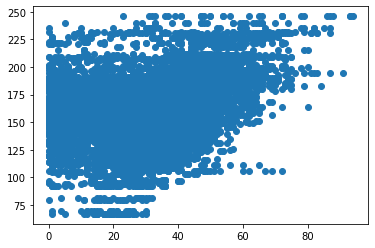

In [57]:
plt.scatter(X_test['runs_last_5'],y_test)
plt.show()

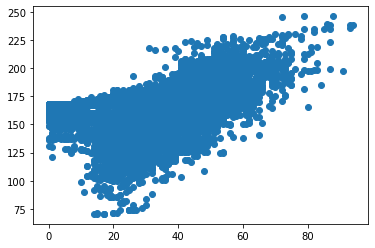

In [58]:
plt.scatter(X_test['runs_last_5'],y_predict)
plt.show()

In [59]:
compare = zip(y_test,y_predict)


In [60]:
# Creating a pickle file for the random forest classifier
import pickle
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(forest_reg_model, open(filename, 'wb'))

In [35]:
X_train.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
16046,124,2,14.4,36,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
59089,110,2,10.2,37,2,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
51362,102,4,14.4,37,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39207,69,4,9.2,42,2,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
47355,96,2,7.4,69,2,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
